# **HOMEWORK 1 - CRYPTOGRAPHY**

```
* Sebastián Granizo 00212771
* Daniela Jiménez   00322800
* Johana Duchi      00321980
```

## 1. The hw-crypto assignment is available in the picoCTF platform. As we discussed in class, you need to write a notebook describing 2 alternative solutions for each problem

### ***picoCTF - interencdec***

#### *_Solution 1_*

I suspected the string was Base64 because it had a mix of uppercase and lowercase letters, numbers, and the equals sign (=) used as padding in Base64. To confirm, I checked if the length was a multiple of 4, a key characteristic of Base64 strings.

[Base64 Rules](https://blog.logto.io/es/todo-sobre-base64)

In [ ]:
import base64

def is_base64(s):
    try:
        # Erase newlines and spaces
        s = s.strip().replace('\n', '').replace(' ', '')

        # Check if the length is multiple of 4
        if len(s) % 4 != 0:
            return False

        # Try to decode the string
        base64.b64decode(s, validate=True)
        return True
    except Exception as e:
        return False

In [ ]:
flag1 = "YidkM0JxZGtwQlRYdHFhR3g2YUhsZmF6TnFlVGwzWVROclh6ZzJhMnd6TW1zeWZRPT0nCg=="
is_valid_base64 = is_base64(flag1)
print(f"The text is Base64: {is_valid_base64}")

The text is Base64: True


I made this function to decode a Base64-encoded string step by step. It filters valid Base64 characters, converts them to decimal values, and then transforms those values into 6-bit binary strings. The binary strings are concatenated, split into 8-bit chunks (representing ASCII), and finally, converted back into readable text.

In [ ]:
def base64_steps(encoded_text):
    base64_chars = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789+/"

    # Step 1: Filter only valid Base64 characters
    encoded_text = ''.join(char for char in encoded_text if char in base64_chars)

    # Step 2: Convert Base64 characters to their decimal values
    decimal_values = [base64_chars.index(char) for char in encoded_text]

    # Step 3: Convert decimal values to 6-bit binary strings
    binary_strings = [format(value, '06b') for value in decimal_values]

    # Step 4: Concatenate all binary strings
    concatenated_bits = ''.join(binary_strings)

    # Step 5: Split concatenated bits into 8-bit chunks (ASCII)
    chunks = [concatenated_bits[i:i+8] for i in range(0, len(concatenated_bits), 8)]

    # Step 6: Convert each 8-bit chunk to decimal (ASCII) and then to characters
    ascii_values = [int(chunk, 2) for chunk in chunks if len(chunk) == 8]
    decoded_text = ''.join([chr(value) for value in ascii_values])

    return decoded_text

In [ ]:
base64_steps(flag1)

"b'd3BqdkpBTXtqaGx6aHlfazNqeTl3YTNrXzg2a2wzMmsyfQ=='\n"

The `b` and `\n` in the result occur because Python treats the output as a bytes object when using Base64 encoding/decoding functions. To ensure that we are only working with the actual decoded string, we remove the `b` and `\n` by converting it to a string. Once we have the clean string, we check if it is still Base64. If it is, we can apply Base64 decoding again to reveal the next layer of the message.

In [ ]:
text2 = "d3BqdkpBTXtqaGx6aHlfazNqeTl3YTNrXzg2a2wzMmsyfQ=="
is_valid_base64 = is_base64(text2)
print(f"The text is Base64: {is_valid_base64}")

The text is Base64: True


In [ ]:
base64_steps(text2)

'wpjvJAM{jhlzhy_k3jy9wa3k_86kl32k2}'

Given that the labels in picoCTF indicated "Caesar," I assumed it could be encoded with a Caesar cipher. A Caesar cipher works by shifting each letter in the text by a fixed number of positions in the alphabet. For example, with a shift of 3, 'A' becomes 'D', 'B' becomes 'E', and so on, wrapping around the alphabet if necessary.

To decrypt the Caesar cipher, I used the tool available at [Dcode's Caesar Cipher](https://www.dcode.fr/caesar-cipher), which allows you to input the encoded string and find the correct shift to reveal the original message.

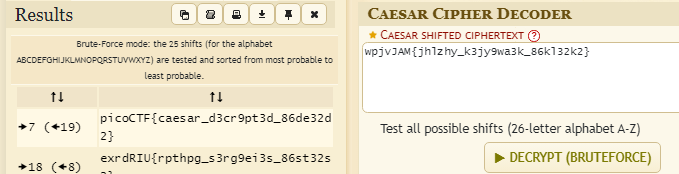

In [ ]:
def caesar_cipher(text, shift):
    decrypted_text = []
    for char in text:
        if char.isalpha():
            shift_base = 65 if char.isupper() else 97
            decrypted_char = chr((ord(char) - shift_base - shift) % 26 + shift_base)
            decrypted_text.append(decrypted_char)
        else:
            decrypted_text.append(char)  # Non-alphabet characters remain the same
    return ''.join(decrypted_text)

In [ ]:
text = "wpjvJAM{jhlzhy_k3jy9wa3k_86kl32k2}"
shift = 7
decrypted_text = caesar_cipher(text, shift)
print(f"Decrypted Text: {decrypted_text}")

Decrypted Text: picoCTF{caesar_d3cr9pt3d_86de32d2}


PicoCTF: the answer is `picoCTF{caesar_d3cr9pt3d_86de32d2}`


#### *Solution 2*

Now for this second approach, we used the **command line** as a part of finding the flag.

We were given a file named "enc_flag", and since the tags of this challenge include `base64` , we can directly decode the text in "enc_flag" by using the command `base64 -D -i` **(macOS command)** on our terminal.

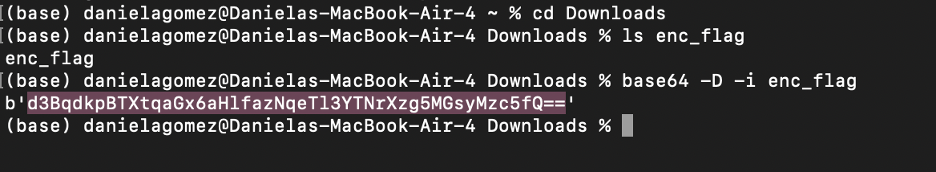

As we can see above, we got the decoded base64 string, so now we can apply base64 decoding once again.

For the second decoding process, we used this website that allows us to input a Base64-encoded string and decode it back into its original form:
-  https://www.base64decode.org

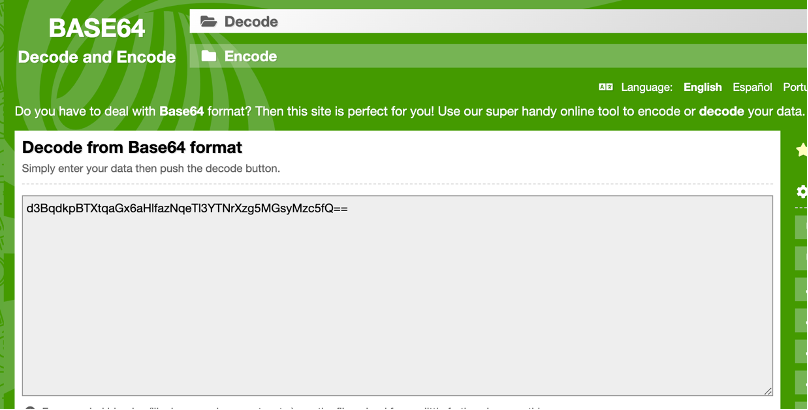

After pasting the base64 string we obtained from executing the terminal command, we decoded it and ended up getting the following output:

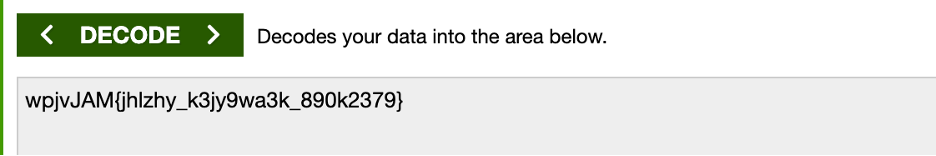

Now, remembering that one of the other challenge tags (besides `base64`) was `caesar`, there was a hint to use the caesar substitution cipher for the next step.

For that, we went to the website:
- https://www.dcode.fr/caesar-cipher

and performed `ROT 13` , which we know it's a specific case of the Caesar cipher, where each letter of the alphabet is shifted by 13 positions and the text is decrypted by making use of brute force.


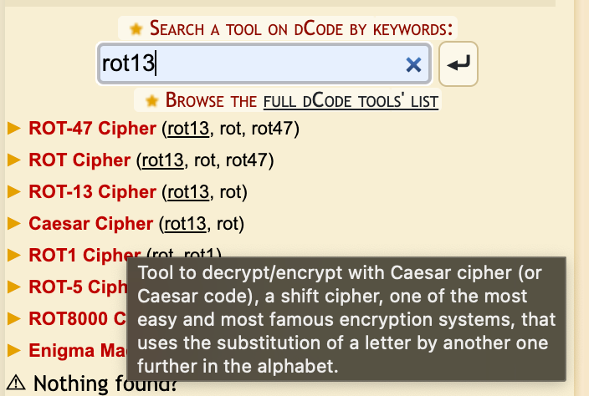

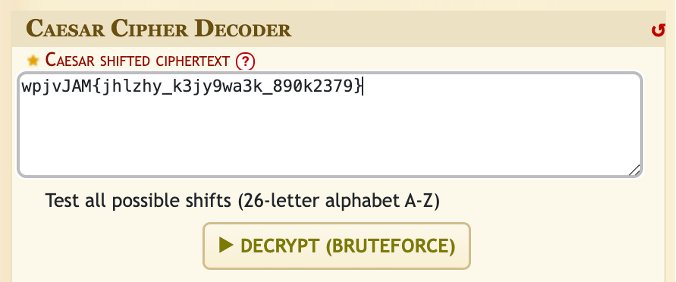

After doing so, we looked through the possible results list that's shown to us on the website, and found the correct flag for this challenge:

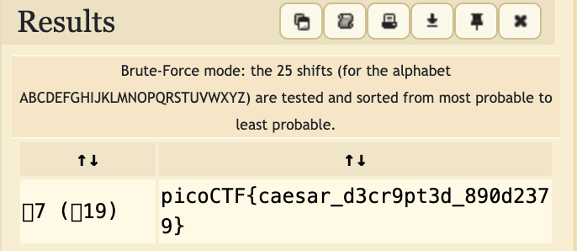

Lastly, we got the flag: `picoCTF{caesar_d3cr9pt3d_890d2379}`

### ***picoCTF - The Numbers***

Flag:

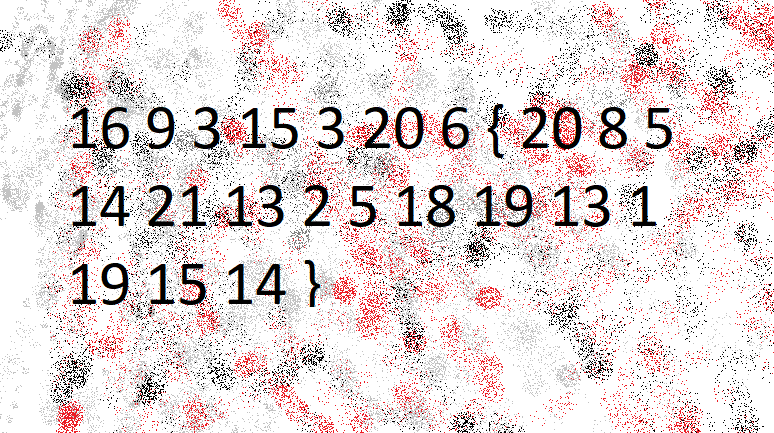

#### *Solution 1*

Given that the string contains only numbers, I identified that it likely uses the AZ26 cipher, where each number represents a position in the alphabet (A=1, B=2, ..., Z=26). Using this method, the numbers can be mapped to their corresponding letters, while non-numeric characters like the curly braces {} are left unchanged.

In [ ]:
def az26_cipher(text):
    alphabet = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
    result = []

    # Split the input text into characters/numbers
    for char in text.split():
        if char.isdigit():
            # Convert the number to its corresponding letter
            num = int(char)
            if 1 <= num <= 26:  # Only map numbers between 1 and 26
                result.append(alphabet[num - 1])
            else:
                result.append('?')
        else:
            # Keep non-numeric characters (like braces) as is
            result.append(char)

    return ''.join(result)

In [ ]:
text4= "16 9 3 15 3 20 6 { 20 8 5 14 21 13 2 5 18 19 13 1 19 15 14 }"
decoded_text = az26_cipher(text4)
print(f"Decoded Text: {decoded_text}")

Decoded Text: PICOCTF{THENUMBERSMASON}


PicoCTF: the answer is `PICOCTF{THENUMBERSMASON}`

#### *Solution 2*

In [26]:
def process_string(s):
    # Split the string into the part before and after the braces
    parts = s.split('{')

    # Get the part before the braces
    part_before_braces = parts[0].strip()

    # Get the part inside the braces (removing the '}' at the end)
    part_inside_braces = parts[1].replace('}', '').strip()

    # Convert both parts into lists of integers
    numbers_outside_braces = list(map(int, part_before_braces.split()))
    numbers_inside_braces = list(map(int, part_inside_braces.split()))

    return numbers_outside_braces, numbers_inside_braces

def decode_numbers(numbers):
    # Convert each number to its corresponding letter
    return ''.join([chr(64 + num) for num in numbers])

# Encoded string
encoded_string = "16 9 3 15 3 20 6{20 8 5 14 21 13 2 5 18 19 13 1 19 15 14}"

# Process the string
outside, inside = process_string(encoded_string)

# Decode the numbers outside and inside the braces
message_outside = decode_numbers(outside)
message_inside = decode_numbers(inside)

# Display the decoded messages
print("Message outside the braces:", message_outside)
print("Message inside the braces:", message_inside)

Message outside the braces: PICOCTF
Message inside the braces: THENUMBERSMASON


### ***picoCTF - C3***

#### *Solution 1*

In [ ]:
out_py = '/content/drive/MyDrive/Colab Notebooks/personal-tests/computer-security/out.py'

In [ ]:
# @title PicoCTF: C3 with python 3


ciphertext = "DLSeGAGDgBNJDQJDCFSFnRBIDjgHoDFCFtHDgJpiHtGDmMAQFnRBJKkBAsTMrsPSDDnEFCFtIbEDtDCIbFCFtHTJDKerFldbFObFCFtLBFkBAAAPFnRBJGEkerFlcPgKkImHnIlATJDKbTbFOkdNnsgbnJRMFnRBNAFkBAAAbrcbTKAkOgFpOgFpOpkBAAAAAAAiClFGIPFnRBaKliCgClFGtIBAAAAAAAOgGEkImHnIl"



In [ ]:
lookup1 = "\n \"#()*+/1:=[]abcdefghijklmnopqrstuvwxyz"
lookup2 = "ABCDEFGHIJKLMNOPQRSTabcdefghijklmnopqrst"

#with open('ciphertext','r') as f:
#    ciphertext = f.read()


prev = 0
out=""
for letter in ciphertext:
    ind = lookup2.index(letter)
    for x in range(100000):
        if (x - prev) % 40 == ind:
            out += lookup1[x]
            prev = x
            break
print(out)

#asciiorder
#fortychars
#selfinput
#pythontwo

chars = ""
from fileinput import input
for line in input():
    chars += line
b = 1 / 1

for i in range(len(chars)):
    if i == b * b * b:
        print chars[i] #prints
        b += 1 / 1



Save as out.py, use the file as input, the hint in the code says self
input.

In [ ]:
with open(out_py) as f:
    ciphertext = f.read()

asciichars = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmn"
b = 1
for i in range(len(ciphertext)):
    if i == b*b*b:
        print(ciphertext[i])
        b += 1

**PicoCTF:** the answer is `picoCTF{adlibs}`


#### *Solution 2*

In [ ]:
#@title PicoCTF C3 with python 2
import sys
chars = ""
from fileinput import input
#for line in input():
#  chars += line

chars = ciphertext

lookup1 = "\n \"#()*+/1:=[]abcdefghijklmnopqrstuvwxyz"
lookup2 = "ABCDEFGHIJKLMNOPQRSTabcdefghijklmnopqrst"

out = ""

prev = 0
for char in chars:
  cur = lookup2.index(char)
  this = lookup1[(cur - prev) % 40]
  out += this
  prev = lookup1.index(this)


sys.stdout.write(out)

 Con el codigo original, se pasa como argumento el cipher y se obtiene el mismo resultado, el cual en el cmd se vuelve a pasar como argumento y se obtiene adlibs

### ***picoCTF - Custom encryption***

Flag:

a = 94

b = 29

cipher is: [260307, 491691, 491691, 2487378, 2516301, 0, 1966764, 1879995, 1995687, 1214766, 0, 2400609, 607383, 144615, 1966764, 0, 636306, 2487378, 28923, 1793226, 694152, 780921, 173538, 173538, 491691, 173538, 751998, 1475073, 925536, 1417227, 751998, 202461, 347076, 491691]

```Python
from random import randint
import sys


def generator(g, x, p):
    return pow(g, x) % p


def encrypt(plaintext, key):
    cipher = []
    for char in plaintext:
        cipher.append(((ord(char) * key*311)))
    return cipher


def is_prime(p):
    v = 0
    for i in range(2, p + 1):
        if p % i == 0:
            v = v + 1
    if v > 1:
        return False
    else:
        return True


def dynamic_xor_encrypt(plaintext, text_key):
    cipher_text = ""
    key_length = len(text_key)
    for i, char in enumerate(plaintext[::-1]):
        key_char = text_key[i % key_length]
        encrypted_char = chr(ord(char) ^ ord(key_char))
        cipher_text += encrypted_char
    return cipher_text


def test(plain_text, text_key):
    p = 97
    g = 31
    if not is_prime(p) and not is_prime(g):
        print("Enter prime numbers")
        return
    a = randint(p-10, p)
    b = randint(g-10, g)
    print(f"a = {a}")
    print(f"b = {b}")
    u = generator(g, a, p)
    v = generator(g, b, p)
    key = generator(v, a, p)
    b_key = generator(u, b, p)
    shared_key = None
    if key == b_key:
        shared_key = key
    else:
        print("Invalid key")
        return
    semi_cipher = dynamic_xor_encrypt(plain_text, text_key)
    cipher = encrypt(semi_cipher, shared_key)
    print(f'cipher is: {cipher}')


if __name__ == "__main__":
    message = sys.argv[1]
    test(message, "trudeau")
```

#### *Solution 1*

1. **Function `generator(g, x, p)`**:  
   This function implements part of the Diffie-Hellman protocol, generating a public key using the generator \( g \), a secret number \( x \), and a prime number \( p \), calculating \( A = g^x \mod p \).

2. **Function `decrypt(cipher, key)`**:  
   This function decrypts a list of numbers (the cipher text) by dividing each number by the product of the shared key and 311, then converts the result to a character.

3. **Function `dynamic_xor_decrypt(ciphertext, text_key)`**:  
   This function applies a dynamic XOR decryption, where each character of the ciphertext is XORed with a character from the key cyclically.

4. **Shared key calculation**:  
   Values \( u \), \( v \), and the shared key \( shared\_key \) are generated using the `generator` function. The ciphertext is decrypted with `decrypt`, and XOR decryption is performed using "trudeau" as the key.


In [28]:
def generator(g, x, p):
  return pow(g, x) % p

def decrypt(cipher, key):
  decrypted_text = ""
  for number in cipher:
      decrypted_num = number // (key * 311)
      decrypted_text += chr(decrypted_num)
  return decrypted_text

def dynamic_xor_decrypt(ciphertext, text_key):
  decrypted_text = ""
  key_length = len(text_key)
  for i, char in enumerate(ciphertext):
    key_char = text_key[i % key_length]
    decrypted_char = chr(ord(char) ^ ord(key_char))
    decrypted_text += decrypted_char
  return decrypted_text

a = 94
b = 29
p = 97
g = 31
cipher = [260307, 491691, 491691, 2487378, 2516301, 0, 1966764, 1879995, 1995687, 1214766, 0, 2400609, 607383, 144615, 1966764, 0, 636306, 2487378, 28923, 1793226, 694152, 780921, 173538, 173538, 491691, 173538, 751998, 1475073, 925536, 1417227, 751998, 202461, 347076, 491691]

u = generator(g, a, p)
v = generator(g, b, p)
shared_key = generator(v, a, p)
ciphertext = decrypt(cipher, shared_key)
print(dynamic_xor_decrypt(ciphertext, "trudeau"))

}cd22a157_d6tp0rc2d_motsuc{FTCocip


In [29]:
texto = "}cd22a157_d6tp0rc2d_motsuc{FTCocip"
texto_invertido = texto[::-1]
print(texto_invertido)

picoCTF{custom_d2cr0pt6d_751a22dc}


#### *Solution 2*

In [30]:
from random import randint
import sys


def generator(g, x, p):
    return pow(g, x) % p


def encrypt(plaintext, key):
    cipher = []
    for char in plaintext:
        cipher.append(((ord(char) * key*311)))
    return cipher


def is_prime(p):
    v = 0
    for i in range(2, p + 1):
        if p % i == 0:
            v = v + 1
    if v > 1:
        return False
    else:
        return True


def dynamic_xor_encrypt(plaintext, text_key):
    cipher_text = ""
    key_length = len(text_key)
    for i, char in enumerate(plaintext[::-1]):
        key_char = text_key[i % key_length]
        encrypted_char = chr(ord(char) ^ ord(key_char))
        cipher_text += encrypted_char
    return cipher_text

def dynamic_xor_decrypt(plaintext, text_key):
    cipher_text = ""
    key_length = len(text_key)

    for i, char in enumerate(plaintext[::-1]):
        key_char = text_key[i % key_length]
        encrypted_char = chr(ord(char) ^ ord(key_char))
        cipher_text += encrypted_char

    plaintext = cipher_text
    cipher_text = ""

    for i, char in enumerate(plaintext[::-1]):
        key_char = text_key[i % key_length]
        encrypted_char = chr(ord(char) ^ ord(key_char))
        cipher_text += encrypted_char

    plaintext = cipher_text
    cipher_text = ""

    for i, char in enumerate(plaintext[::-1]):
        key_char = text_key[i % key_length]
        encrypted_char = chr(ord(char) ^ ord(key_char))
        cipher_text += encrypted_char

    return cipher_text


def test(plain_text, text_key):
    p = 97
    g = 31
    if not is_prime(p) and not is_prime(g):
        print("Enter prime numbers")
        return
    a = randint(p-10, p)
    b = randint(g-10, g)
    print(f"a = {a}")
    print(f"b = {b}")
    u = generator(g, a, p)
    v = generator(g, b, p)
    key = generator(v, a, p)
    b_key = generator(u, b, p)
    shared_key = None
    if key == b_key:
        shared_key = key
    else:
        print("Invalid key")
        return
    semi_cipher = dynamic_xor_encrypt(plain_text, text_key)
    cipher = encrypt(semi_cipher, shared_key)
    print(f'cipher is: {cipher}')

def decrypt(cipher, key):
    plaintext = ""
    for encrypted_value in cipher:
        decrypted_value = encrypted_value // (key * 311)
        plaintext += chr(decrypted_value)
    return plaintext

def test2():
    p = 97
    g = 31
    a = 94
    b = 21

    u = generator(g, a, p)
    v = generator(g, b, p)
    key = generator(v, a, p)
    b_key = generator(u, b, p)

    shared_key = None
    if key == b_key:
        shared_key = key
    else:
        print("Invalid key")
        return

    cipher = [131553, 993956, 964722, 1359381, 43851, 1169360, 950105, 321574, 1081658, 613914, 0, 1213211, 306957, 73085, 993956, 0, 321574, 1257062, 14617, 906254, 350808, 394659, 87702, 87702, 248489, 87702, 380042, 745467, 467744, 716233, 380042, 102319, 175404, 248489]
    semi_cipher = decrypt(cipher, shared_key)

    flag = dynamic_xor_decrypt(semi_cipher, "trudeau")

    print(flag)


if __name__ == "__main__":
    # message = sys.argv[1]
    # test(message, "trudeau")
    test2()

picoCTF{custom_d2cr0pt6d_8b41f976}


### ***picoCTF - rotation***

#### *Solution 1*

- **Flag:** xqkwKBN{z0bib1wv_l3kzgxb3l_7l140864}

From previous picoCTF exercises we know that the expected output is: picoCTF{whatever}, so we can use https://quipqiup.com/ to input the encripted flag and the clue, which is picoCTF=xqkwKBN,


And we get: `picoCTF{r0tat1on_e3crypt3e_7e140864}`

#### *Solution 2*

In [31]:
def caesar_shift(text, shift):
    decrypted = ""
    for char in text:
        if char.isalpha():  # Apply shift only to alphabetic characters
            shift_base = 65 if char.isupper() else 97
            decrypted += chr((ord(char) - shift_base + shift) % 26 + shift_base)
        else:
            decrypted += char  # Non-alphabetic characters remain unchanged
    return decrypted

cipher_text = "xqkwKBN{z0bib1wv_l3kzgxb3l_4k71n5j0}"

# Try all possible shifts (1 to 25)
for shift in range(1, 26):
    decrypted_text = caesar_shift(cipher_text, shift)
    if decrypted_text.startswith("picoCTF{"):
        print(f"Correct shift: {shift}")
        print(f"Decrypted message: {decrypted_text}")
        break

Correct shift: 18
Decrypted message: picoCTF{r0tat1on_d3crypt3d_4c71f5b0}


## 2. Prove that if a cryptosystem has perfect secrecy and |K|= |C|= |P|, then every ciphertext is equally probable.

Given that a cryptosystem has `perfect secrecy` and `|K| = |C| = |P|`, the ciphertext is **equally probable**.

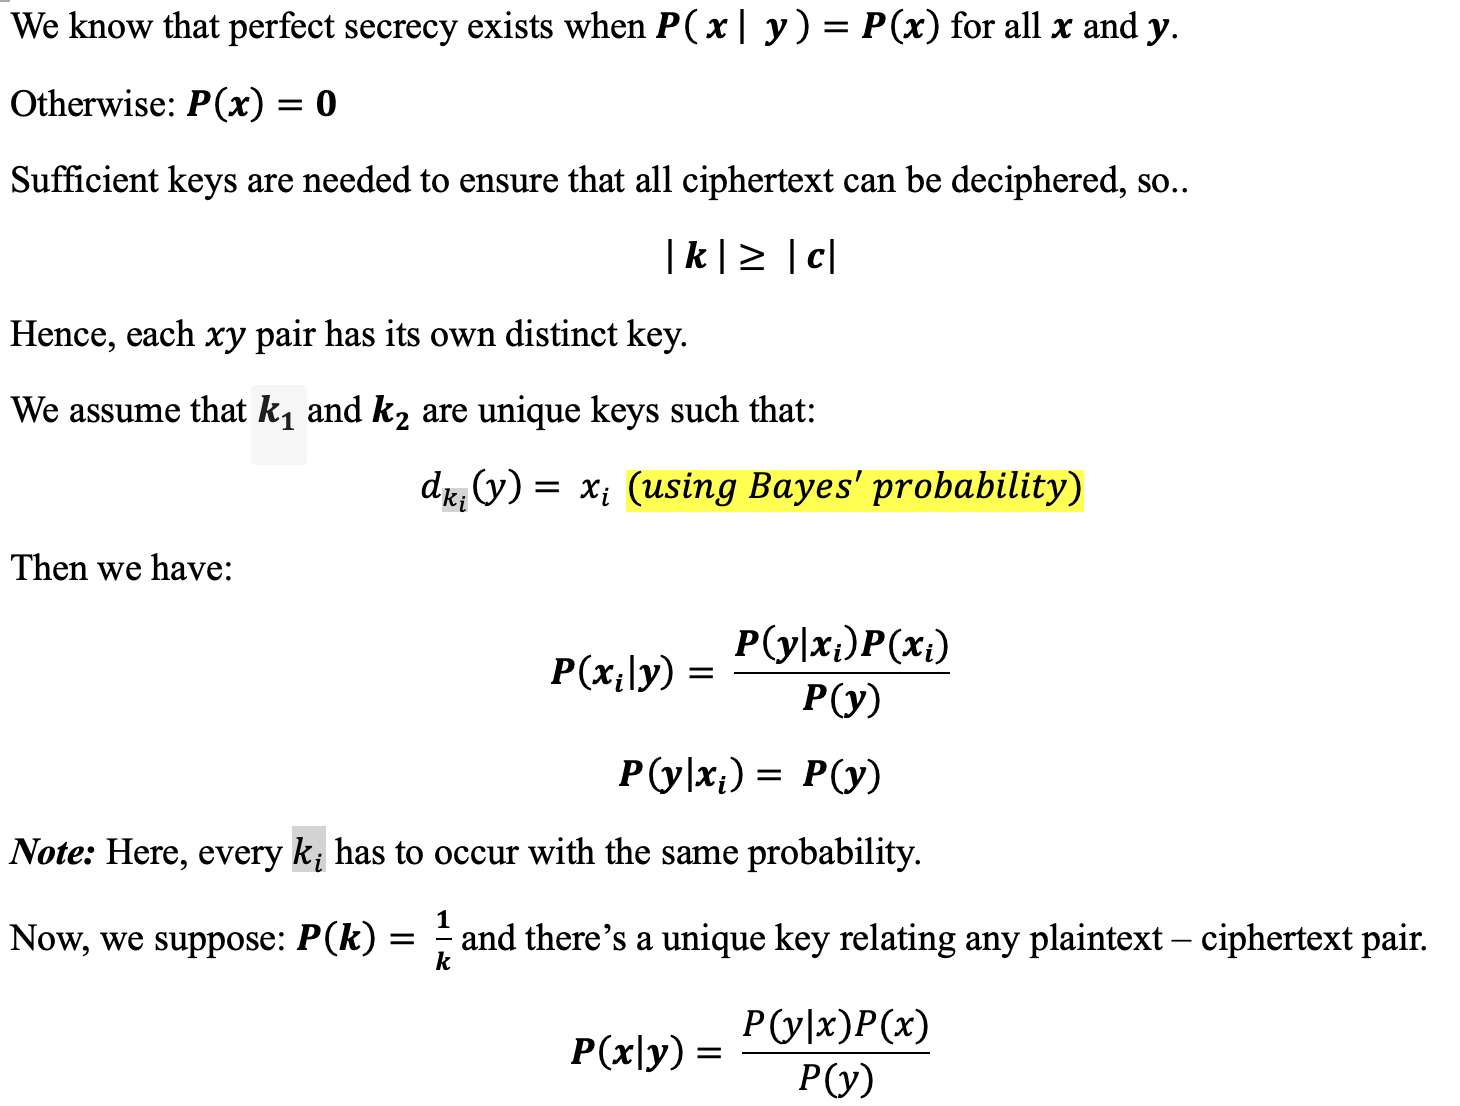

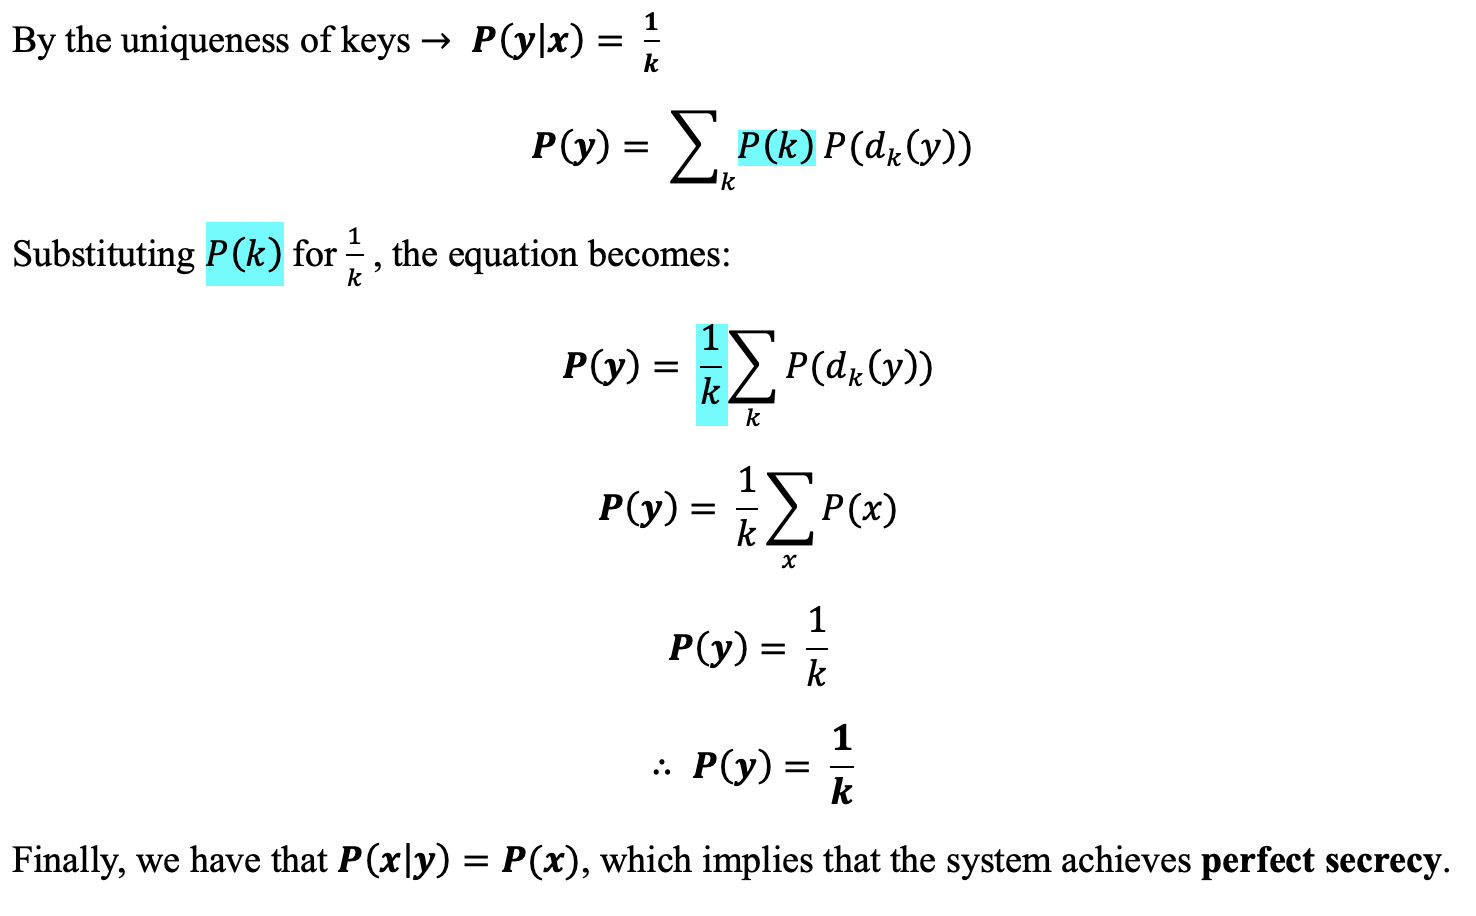

## 3. Suppose that APNDJI or XYGROBO are ciphertexts that are obtained from encryption using the Shift Cipher. Show in each case that there are two ”meaningful” plaintexts that could encrypt to the given ciphertext.

In [32]:
out_py = '/content/drive/MyDrive/Colab Notebooks/personal-tests/computer-security/out.py'

**EXERCISE 3:** Suppose that APNDJI or XYGROBO are ciphertexts that are obtained from encryption using the Shift Cipher. Show in each case that there are two ”meaningful” plaintexts that could encrypt to the given ciphertext.

In [33]:
#@title EXERCISE 3

import string

# Function to decrypt Shift Cipher (Caesar Cipher) with a given shift
def decrypt_shift_cipher(ciphertext, shift):
    decrypted_text = []
    for char in ciphertext:
        if char in string.ascii_uppercase:
            shifted_char = chr((ord(char) - ord('A') - shift) % 26 + ord('A'))
            decrypted_text.append(shifted_char)
        else:
            decrypted_text.append(char)  # Non-alphabet characters remain unchanged
    return ''.join(decrypted_text)

# Function to brute force all possible shifts for a given ciphertext
def brute_force_shift_cipher(ciphertext):
    results = []
    for shift in range(26):
        decrypted_text = decrypt_shift_cipher(ciphertext, shift)
        results.append((shift, decrypted_text))
    return results

# Example ciphertexts
ciphertexts = ["APNDJI", "XYGROBO"]

# Brute-force each ciphertext and print meaningful candidates
for ciphertext in ciphertexts:
    print(f"\nBrute-forcing ciphertext: {ciphertext}")
    possible_plaintexts = brute_force_shift_cipher(ciphertext)

    # Display the decryption results
    for shift, decrypted in possible_plaintexts:
        print(f"Shift {shift}: {decrypted}")

# You can manually inspect the results and find meaningful plaintexts.



Brute-forcing ciphertext: APNDJI
Shift 0: APNDJI
Shift 1: ZOMCIH
Shift 2: YNLBHG
Shift 3: XMKAGF
Shift 4: WLJZFE
Shift 5: VKIYED
Shift 6: UJHXDC
Shift 7: TIGWCB
Shift 8: SHFVBA
Shift 9: RGEUAZ
Shift 10: QFDTZY
Shift 11: PECSYX
Shift 12: ODBRXW
Shift 13: NCAQWV
Shift 14: MBZPVU
Shift 15: LAYOUT
Shift 16: KZXNTS
Shift 17: JYWMSR
Shift 18: IXVLRQ
Shift 19: HWUKQP
Shift 20: GVTJPO
Shift 21: FUSION
Shift 22: ETRHNM
Shift 23: DSQGML
Shift 24: CRPFLK
Shift 25: BQOEKJ

Brute-forcing ciphertext: XYGROBO
Shift 0: XYGROBO
Shift 1: WXFQNAN
Shift 2: VWEPMZM
Shift 3: UVDOLYL
Shift 4: TUCNKXK
Shift 5: STBMJWJ
Shift 6: RSALIVI
Shift 7: QRZKHUH
Shift 8: PQYJGTG
Shift 9: OPXIFSF
Shift 10: NOWHERE
Shift 11: MNVGDQD
Shift 12: LMUFCPC
Shift 13: KLTEBOB
Shift 14: JKSDANA
Shift 15: IJRCZMZ
Shift 16: HIQBYLY
Shift 17: GHPAXKX
Shift 18: FGOZWJW
Shift 19: EFNYVIV
Shift 20: DEMXUHU
Shift 21: CDLWTGT
Shift 22: BCKVSFS
Shift 23: ABJURER
Shift 24: ZAITQDQ
Shift 25: YZHSPCP


For the ciphertext: APNDJI, the 2 meaningful messages I found are: LAYOUT and FUSION, and for the ciphertext: XYGROBO, i found NOWHERE and ABJURER

In [ ]:
from collections import defaultdict

# Función para realizar el análisis de Kasiski en una cadena
def kasiski_analysis(text, min_length=3):
    subsequence_positions = defaultdict(list)

    # Buscar todas las subcadenas de longitud min_length o mayor
    for i in range(len(text) - min_length + 1):
        for length in range(min_length, len(text) - i + 1):
            substring = text[i:i + length]
            subsequence_positions[substring].append(i)

    # Filtrar subcadenas que se repiten
    repeated_subsequences = {seq: pos for seq, pos in subsequence_positions.items() if len(pos) > 1}

    # Mostrar resultados
    for seq, positions in repeated_subsequences.items():
        print(f'Subcadena: "{seq}" encontrada en posiciones: {positions}')
        # Calcular distancias entre las apariciones
        distances = [positions[i] - positions[i-1] for i in range(1, len(positions))]
        print(f'Distancias entre apariciones: {distances}\n')

# Ejemplo de uso
texto = "BNVSNSIHQCEELSSKKYERIFJKXUMBGYKAMQLJTYAVFBKVTDVBPVVRJYYLAOKYMPQSCGDLFSRLLPROYGESEBUUALRWXMMASAZLGLEDFJBZAVVPXWICGJXASCBYEHOSNMULKCEAHTQOKMFLEBKFXLRRFDTZXCIWBJSICBGAWDVYDHAVFJXZIBKCGJIWEAHTTOEWTUHKRQVVRGZBXYIREMMASCSPBNLHJMBLRFFJELHWEYLWISTFVVYFJCMHYUYRUFSFMGESIGRLWALSWMNUHSIMYYITCCQPZSICEHBCCMZFEGVJYOCDEMMPGHVAAUMELCMOEHVLTIPSUYILVGFLMVWDVYDBTHFRAYISYSGKVSUUHYHGGCKTMBLRX"
kasiski_analysis(texto)


Subcadena: "AVF" encontrada en posiciones: [38, 170]
Distancias entre apariciones: [132]

Subcadena: "VVR" encontrada en posiciones: [49, 198]
Distancias entre apariciones: [149]

Subcadena: "GES" encontrada en posiciones: [77, 257]
Distancias entre apariciones: [180]

Subcadena: "MMA" encontrada en posiciones: [89, 209]
Distancias entre apariciones: [120]

Subcadena: "MMAS" encontrada en posiciones: [89, 209]
Distancias entre apariciones: [120]

Subcadena: "MAS" encontrada en posiciones: [90, 210]
Distancias entre apariciones: [120]

Subcadena: "CGJ" encontrada en posiciones: [111, 179]
Distancias entre apariciones: [68]

Subcadena: "ASC" encontrada en posiciones: [115, 211]
Distancias entre apariciones: [96]

Subcadena: "EAH" encontrada en posiciones: [130, 184]
Distancias entre apariciones: [54]

Subcadena: "EAHT" encontrada en posiciones: [130, 184]
Distancias entre apariciones: [54]

Subcadena: "AHT" encontrada en posiciones: [131, 185]
Distancias entre apariciones: [54]

Subcaden

## 4. Compute H(K|C) and H(K|P, C) for the Affine Cipher, assuming that keys are used equiprobably and the plaintexts are equiprobable.

#### **Step 1: Calculate Euler's Totient Function $\phi(n)$**





For $n=26$

1. Factorize $n$:
$n=2\times{13}$
2. Compute $\phi(n)$

  $\phi(n) = n \left( 1 - \frac{1}{2} \right) \left( 1 - \frac{1}{13} \right) = 26 \times \frac{1}{2} \times \frac{12}{13} = 12$




#### **Step 2: Calculate the Total Number of Keys $∣𝐾∣$**

$
|K| = \phi(n) \times n = 12 \times 26 = 312$

#### **Step 3: Compute $H(K | C)$)**


$\text{Since } H(K|C) = H(K) \text{ (because } I(K;C) = 0 \text{):}$

$H(K|C) = \log_2 |K| = \log_2 312.$

$\textbf{Compute } \log_2 312:$

$1. \text{Use the logarithm property:}$

$\log_2 312 = \log_2 (256 \times 1.21875) = \log_2 256 + \log_2 1.21875.$

$2. \text{Calculate } \log_2 256 = 8 \text{ (since } 2^8 = 256).$

$3. \text{Calculate } \log_2 1.21875:$

$\log_2 1.21875 \approx \frac{\ln 1.21875}{\ln 2} \approx \frac{0.1970}{0.6931} \approx 0.2840$

$4. \text{Sum them up:}$

$H(K|C) = 8 + 0.2840 = 8.2840 \text{ bits.}$

#### **Step 4: Compute $H(K∣P,C)$**

$H(K|P, C) = \log_2 \phi(n) = \log_2 12$

$\textbf{Compute } \log_2 12:$

$1. \text{Use the logarithm property:}$

$\log_2 12 = \log_2 (8 \times 1.5) = \log_2 8 + \log_2 1.5$

$2. \text{Calculate } \log_2 8 = 3 \text{ (since } 2^3 = 8)$

$3. \text{Calculate } \log_2 1.5:$

$\log_2 1.5 \approx \frac{\ln 1.5}{\ln 2} \approx \frac{0.4055}{0.6931} \approx 0.58496$

$4. \text{Sum them up:}$

$H(K|P, C) = 3 + 0.58496 = 3.58496 \text{ bits}$


#### **Final Numerical Answers**

$1. \ H(K|C) \approx 8.2840 \ \text{bits}$

$2. \ H(K|P, C) \approx 3.58496 \ \text{bits}$


## 5. Below are given four examples of ciphertext, one obtained from a Substitution Cipher, one from a Vigen` ere Cipher, one from an Affine Cipher, and one unspecified. In each case, the task is to determine the plaintext. Give a clearly written description of the steps you followed to decrypt each ciphertext. This should include all statistical analysis and computations you performed. The first two plaintexts were taken from The Diary of Samuel Marchbanks, by Robertson Davies, Clarke Irwin, 1947; the fourth was taken from Lake Wobegon Days, by Garrison Keillor, Viking Penguin, Inc., 1985.

#### *1. Substitution Cipher:*

EMGLOSUDCGDNCUSWYSFHNSFCYKDPUMLWGYICOXYSIPJCKQPKUGKMGOLICGINCGACKSNISACYKZSCKXECJCKSHYSXCGOIDPKZCNKSHICGIWYGKKGKGOLDSILKGOIUSIGLEDSPWZUGFZCCNDGYYSFUSZCNXEOJNCGYEOWEUPXEZGACGNFGLKNSACIGOIYCKXCJUCIUZCFZCCNDGYYSFEUEKUZCSOCFZCCNCIACZEJNCSHFZEJZEGMXCYHCJUMGKUCY

Letters in order of frequency:
c: 37
g: 24
s: 20
k: 18
y: 15
i: 15
u: 14
n: 13
z: 13
e: 12
o: 10
f: 9
d: 8
l: 7
x: 7
j: 7
p: 6
m: 5
w: 5
h: 5
a: 5
q: 1


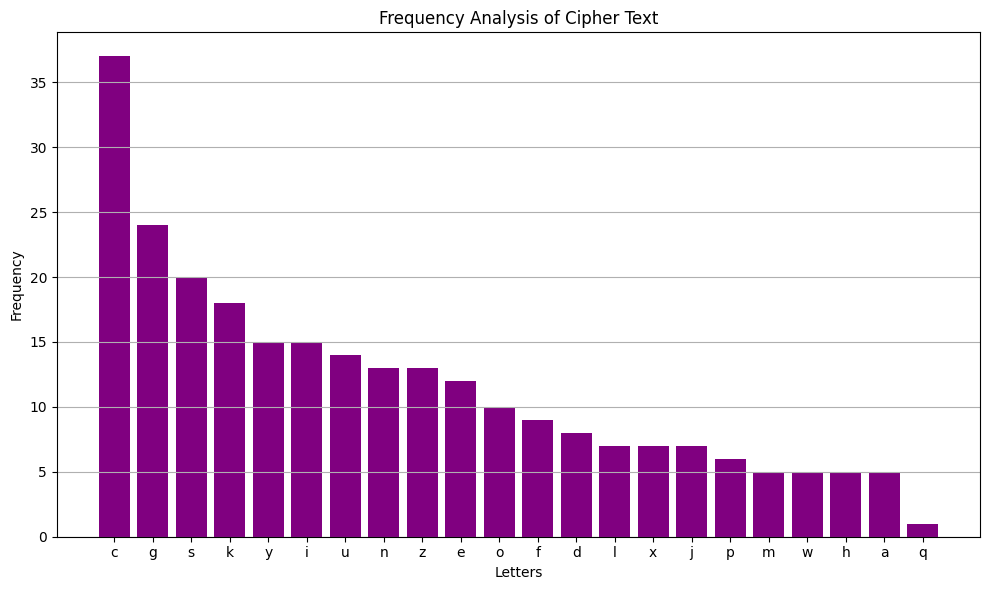

Most common digrams:
cg: 7
zc: 7
nc: 5
ys: 5
ck: 5
go: 5
ac: 5
cn: 5
sf: 4
cy: 4
gy: 4
gk: 4
fz: 4
mg: 3
gl: 3
us: 3
ic: 3
si: 3
ku: 3
ks: 3
xe: 3
cj: 3
sh: 3
xc: 3
oi: 3
kg: 3
cc: 3
ci: 3
ze: 3
wy: 2
ns: 2
yk: 2
dp: 2
um: 2
jc: 2
pk: 2
ug: 2
ol: 2
gi: 2
ga: 2
sa: 2
kz: 2
kx: 2
ds: 2
lk: 2
iu: 2
ig: 2
nd: 2
dg: 2
yy: 2
eo: 2
jn: 2
eu: 2
ju: 2
uc: 2
uz: 2
cf: 2
cs: 2
ej: 2
em: 1
lo: 1
os: 1
su: 1
ud: 1
dc: 1
gd: 1
dn: 1
cu: 1
sw: 1
fh: 1
hn: 1
fc: 1
kd: 1
pu: 1
ml: 1
lw: 1
wg: 1
yi: 1
co: 1
ox: 1
xy: 1
ip: 1
pj: 1
kq: 1
qp: 1
km: 1
li: 1
in: 1
sn: 1
ni: 1
is: 1
zs: 1
sc: 1
ec: 1
hy: 1
sx: 1
id: 1
nk: 1
hi: 1
iw: 1
yg: 1
kk: 1
ld: 1
il: 1
le: 1
ed: 1
sp: 1
pw: 1
wz: 1
zu: 1
gf: 1
fu: 1
sz: 1
nx: 1
oj: 1
ye: 1
ow: 1
we: 1
up: 1
px: 1
ez: 1
zg: 1
gn: 1
nf: 1
fg: 1
kn: 1
iy: 1
yc: 1
fe: 1
ue: 1
ek: 1
so: 1
oc: 1
ia: 1
cz: 1
hf: 1
jz: 1
eg: 1
gm: 1
mx: 1
yh: 1
hc: 1


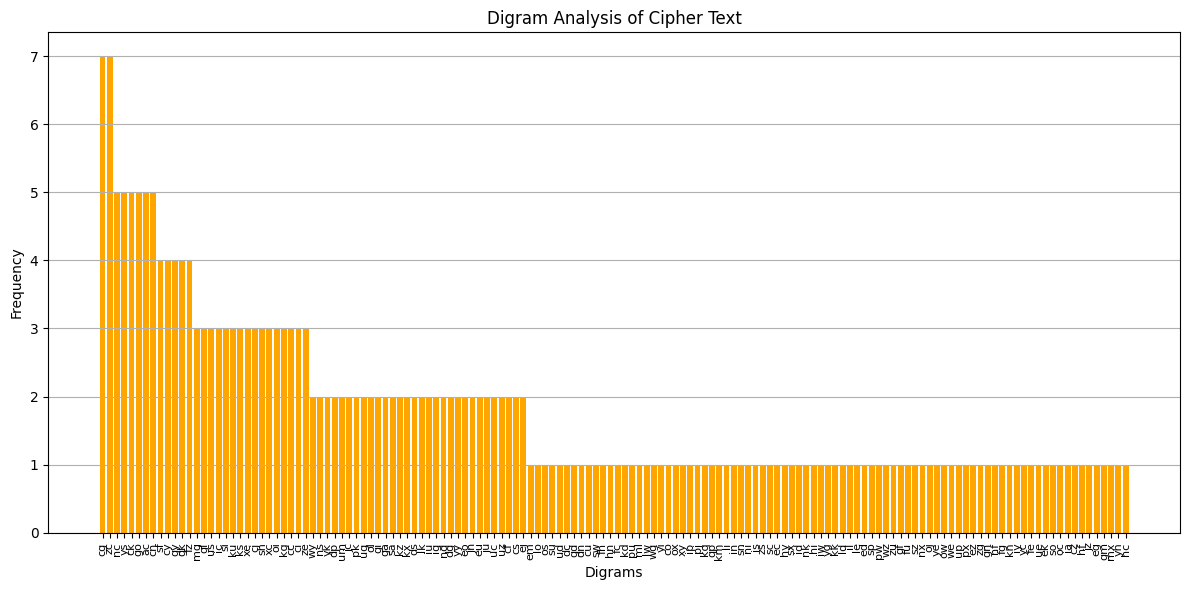

Top 50 most common trigrams:
ysf: 3
goi: 3
fzc: 3
zcc: 3
ccn: 3
cyk: 2
jck: 2
gol: 2
icg: 2
cgi: 2
ncg: 2
gac: 2
cks: 2
sac: 2
ckx: 2
ksh: 2
zcn: 2
kgo: 2
cnd: 2
ndg: 2
dgy: 2
gyy: 2
yys: 2
jnc: 2
cju: 2
uzc: 2
cfz: 2
zej: 2
emg: 1
mgl: 1
glo: 1
los: 1
osu: 1
sud: 1
udc: 1
dcg: 1
cgd: 1
gdn: 1
dnc: 1
ncu: 1
cus: 1
usw: 1
swy: 1
wys: 1
sfh: 1
fhn: 1
hns: 1
nsf: 1
sfc: 1
fcy: 1


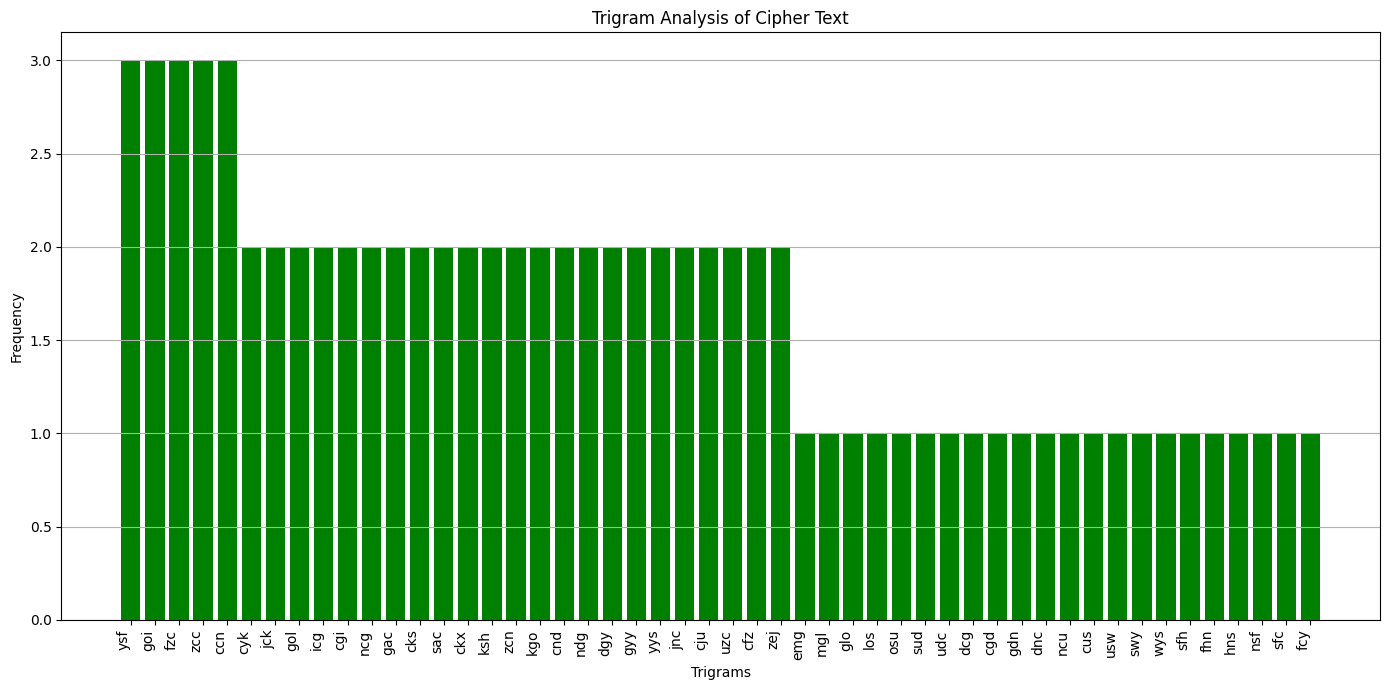


Decrypted Text so far:
 IMAYNOTBEABLETOGROWFLOWERSBUTMYGARDENPRODUCESJUSTASMANYDEADLEAAESOLDOAERSHOESPIECESOFROPEANDBUSHELSOFDEADGRASSASANYBODYSANDTODAYIBOUGHTAWHEELBARROWTOHELPINCLEARINGITUPIHAAEALWAYSLOAEDANDRESPECTEDTHEWHEELBARROWITISTHEONEWHEELEDAEHICLEOFWHICHIAMPERFECTMASTER


In [ ]:
from collections import Counter
from matplotlib import pyplot as plt
import re

# Frequency analysis function
def frequency_analysis(cipher_text):
    cipher_text = ''.join(filter(str.isalpha, cipher_text)).lower()
    frequency = Counter(cipher_text)
    sorted_frequency = dict(sorted(frequency.items(), key=lambda item: item[1], reverse=True))

    print("Letters in order of frequency:")
    for letter, count in sorted_frequency.items():
        print(f"{letter}: {count}")

    plt.figure(figsize=(10, 6))
    plt.bar(sorted_frequency.keys(), sorted_frequency.values(), color='purple')
    plt.xlabel('Letters')
    plt.ylabel('Frequency')
    plt.title('Frequency Analysis of Cipher Text')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

# Function for digram analysis
def digram_analysis(cipher_text):
    cipher_text = ''.join(filter(str.isalpha, cipher_text)).lower()
    digrams = [cipher_text[i:i+2] for i in range(len(cipher_text) - 1)]
    digram_frequency = Counter(digrams)
    sorted_digrams = dict(sorted(digram_frequency.items(), key=lambda item: item[1], reverse=True))

    print("Most common digrams:")
    for digram, count in sorted_digrams.items():
        print(f"{digram}: {count}")

    plt.figure(figsize=(12, 6))  # Increase figure size for better readability
    plt.bar(sorted_digrams.keys(), sorted_digrams.values(), color='orange')
    plt.xlabel('Digrams')
    plt.ylabel('Frequency')
    plt.title('Digram Analysis of Cipher Text')
    plt.xticks(rotation=90, fontsize=8)  # Rotate labels for better display and adjust fontsize
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

# Function for trigram analysis
def trigram_analysis(cipher_text, top_n=50):
    cipher_text = ''.join(filter(str.isalpha, cipher_text)).lower()
    trigrams = [cipher_text[i:i+3] for i in range(len(cipher_text) - 2)]
    trigram_frequency = Counter(trigrams)
    sorted_trigrams = dict(sorted(trigram_frequency.items(), key=lambda item: item[1], reverse=True))

    # Select top N trigrams to display
    top_trigrams = dict(list(sorted_trigrams.items())[:top_n])

    print(f"Top {top_n} most common trigrams:")
    for trigram, count in top_trigrams.items():
        print(f"{trigram}: {count}")

    plt.figure(figsize=(14, 7))  # Increase figure size for better readability
    plt.bar(top_trigrams.keys(), top_trigrams.values(), color='green', width=0.8)  # Adjust bar width

    plt.xlabel('Trigrams')
    plt.ylabel('Frequency')
    plt.title(f'Trigram Analysis of Cipher Text')

    # Rotate the x-axis labels and stagger them for better readability
    plt.xticks(rotation=90, fontsize=10, ha='right')  # Rotate and align the labels to the right

    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

# Decrypt function with dynamic key for substitutions
def decrypt_text(ciphertext, substitution_dict):
    decrypted_text = ''.join(substitution_dict.get(char, char) for char in ciphertext)
    return decrypted_text

# Example cipher text
ciphertext = 'EMGLOSUDCGDNCUSWYSFHNSFCYKDPUMLWGYICOXYSIPJCKQPKUGKMGOLICGINCGACKSNISACYKZSCKXECJCKSHYSXCGOIDPKZCNKSHICGIWYGKKGKGOLDSILKGOIUSIGLEDSPWZUGFZCCNDGYYSFUSZCNXEOJNCGYEOWEUPXEZGACGNFGLKNSACIGOIYCKXCJUCIUZCFZCCNDGYYSFEUEKUZCSOCFZCCNCIACZEJNCSHFZEJZEGMXCYHCJUMGKUCY'

# Perform frequency analysis
frequency_analysis(ciphertext)

# Perform digram and trigram analysis:
digram_analysis(ciphertext)
trigram_analysis(ciphertext)

# Substitution dictionary based on analysis of digrams and trigrams:
substitution_dict = {
    'C': 'E',  # 'C' -> 'E'
    'D': 'B',  # 'D' -> 'B'
    'E': 'I',  # 'E' -> 'I'
    'F': 'W',  # 'F' -> 'W'
    'G': 'A',  # 'G' -> 'A'
    'H': 'F',  # 'H' -> 'F'
    'I': 'D',  # 'I' -> 'D'
    'J': 'C',  # 'J' -> 'C'
    'K': 'S',  # 'K' -> 'S'
    'L': 'Y',  # 'L' -> 'Y'
    'M': 'M',  # 'M' -> 'M'
    'N': 'L',  # 'N' -> 'L'
    'O': 'N',  # 'O' -> 'N'
    'P': 'U',  # 'P' -> 'U'
    'Q': 'J',  # 'Q' -> 'J'
    'S': 'O',  # 'S' -> 'O'
    'U': 'T',  # 'U' -> 'T'
    'W': 'G',  # 'W' -> 'G'
    'X': 'P',  # 'X' -> 'P'
    'Y': 'R',  # 'Y' -> 'R'
    'Z': 'H',  # 'Z' -> 'H'
}

# Decrypt the text using the substitution dictionary
decrypted_text = decrypt_text(ciphertext, substitution_dict)
print("\nDecrypted Text so far:\n", decrypted_text)

#### *2. Vigenere Cipher:*

KCCPKBGUFDPHQTYAVINRRTMVGRKDNBVFDETDGILTXRGUDDKOTFMBPVGEGLTGCKQRACQCWDNAWCRXIZAKFTLEWRPTYCQKYVXCHKFTPONCQQRHJVAJUWETMCMSPKQDYHJVDAHCTRLSVSKCGCZQQDZXGSFRLSWCWSJTBHAFSIASPRJAHKJRJUMVGKMITZHFPDISPZLVLGWTFPLKKEBDPGCEBSHCTJRWXBAFSPEZQNRWXCVYCGAONWDDKACKAWBBIKFTIOVKCGGHJVLNHIFFSQESVYCLACNVRWBBIREPBBVFEXOSCDYGZWPFDTKFQIYCWHJVLNHIQIBTKHJVNPIST

##### **Step 1: Option 1 - Kasiski Test**

The first step is the Kasiski Test because it helps to estimate the key length, which is crucial for Vigenère cipher.

In [ ]:
def kasiski_test(ciphertext):
    sequences = {}
    # Look for repeated 3-letter sequences (trigrams)
    for i in range(len(ciphertext) - 3):
        trigram = ciphertext[i:i+3]
        if trigram in sequences:
            sequences[trigram].append(i)
        else:
            sequences[trigram] = [i]

    # Filter out sequences that repeat
    repeated_sequences = {k: v for k, v in sequences.items() if len(v) > 1}

    # Calculate the distances between repetitions
    distances = {}
    for seq, positions in repeated_sequences.items():
        dist = [positions[i+1] - positions[i] for i in range(len(positions) - 1)]
        distances[seq] = dist

    return distances

In [ ]:
ciphertext = "KCCPKBGUFDPHQTYAVINRRTMVGRKDNBVFDETDGILTXRGUDDKOTFMBPVGEGLTGCKQRACQCWDNAWCRXIZAKFTLEWRPTYCQKYVXCHKFTPONCQQRHJVAJUWETMCMSPKQDYHJVDAHCTRLSVSKCGCZQQDZXGSFRLSWCWSJTBHAFSIASPRJAHKJRJUMVGKMITZHFPDISPZLVLGWTFPLKKEBDPGCEBSHCTJRWXBAFSPEZQNRWXCVYCGAONWDDKACKAWBBIKFTIOVKCGGHJVLNHIFFSQESVYCLACNVRWBBIREPBBVFEXOSCDYGZWPFDTKFQIYCWHJVLNHIQIBTKHJVNPIST"

# Apply the Kasiski test
distances = kasiski_test(ciphertext)
print("Distances between repetitions:\n", distances)

Distances between repetitions:
 {'MVG': [156], 'BVF': [264], 'DDK': [198], 'KFT': [18, 156], 'HJV': [18, 138, 54, 12], 'HCT': [84], 'RLS': [18], 'KCG': [121], 'AFS': [60], 'RWX': [12], 'VYC': [42], 'WBB': [36], 'BBI': [36], 'JVL': [54], 'VLN': [54], 'LNH': [54], 'NHI': [54]}


Since "HJV" has the most repetitions (four in total), we will calculate the greatest common divisor (GCD) of the distances between its positions (18, 138, 54, and 12) to estimate the key length.

In [ ]:
import math

# Distances found in the Kasiski test
distances = [18, 138, 54, 12]

# Calculate the GCD of all the distances
gcd_value = math.gcd(distances[0], distances[1])
for distance in distances[2:]:
    gcd_value = math.gcd(gcd_value, distance)

print("Greatest common divisor (GCD) of the distances:", gcd_value)

Greatest common divisor (GCD) of the distances: 6


The key length was confirmed to be 6 using the tool at [Kasiski Test](https://planetcalc.com/8550/), which validates our assumption.

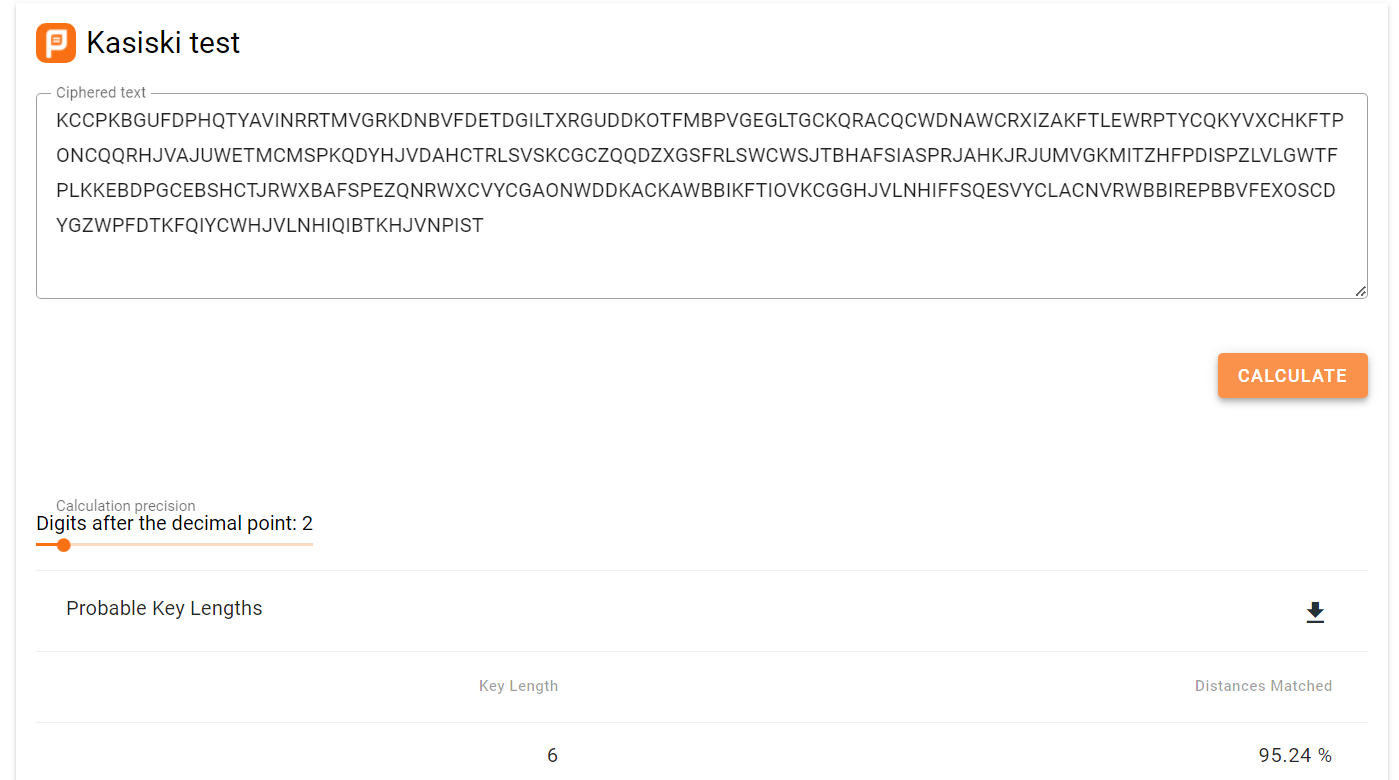

##### **Step 1: Option 2 - IC**

Key Length: 1, Average IC: 0.0409
Key Length: 2, Average IC: 0.0428
Key Length: 3, Average IC: 0.0508
Key Length: 4, Average IC: 0.0417
Key Length: 5, Average IC: 0.0393
Key Length: 6, Average IC: 0.0628
Key Length: 7, Average IC: 0.0412
Key Length: 8, Average IC: 0.0410
Key Length: 9, Average IC: 0.0491


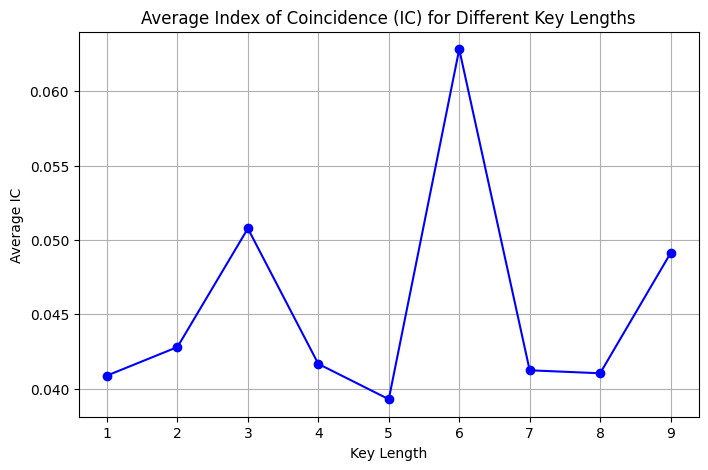

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# Function to calculate the Index of Coincidence (IC)
def index_of_coincidence(text):
    n = len(text)
    frequency = Counter(text)
    if n <= 1:
        return 0
    ic = sum(f * (f - 1) for f in frequency.values()) / (n * (n - 1))
    return ic

#   Ciphertext
ciphertext = "KCCPKBGUFDPHQTYAVINRRTMVGRKDNBVFDETDGILTXRGUDDKOTFMBPVGEGLTGCKQRACQCWDNAWCRXIZAKFTLEWRPTYCQKYVXCHKFTPONCQQRHJVAJUWETMCMSPKQDYHJVDAHCTRLSVSKCGCZQQDZXGSFRLSWCWSJTBHAFSIASPRJAHKJRJUMVGKMITZHFPDISPZLVLGWTFPLKKEBDPGCEBSHCTJRWXBAFSPEZQNRWXCVYCGAONWDDKACKAWBBIKFTIOVKCGGHJVLNHIFFSQESVYCLACNVRWBBIREPBBVFEXOSCDYGZWPFDTKFQIYCWHJVLNHIQIBTKHJVNPIST"

# Test key lengths from 1 to 9
min_key_length = 1
max_key_length = 9
key_lengths = list(range(min_key_length, max_key_length + 1))
average_ic_per_key_length = []

# Test each key length
for key_length in key_lengths:
    # Divide the ciphertext into groups/columns based on the key length
    columns = [''.join(ciphertext[i::key_length]) for i in range(key_length)]

    # Calculate the IC for each column and average them
    ic_values = [index_of_coincidence(column) for column in columns]
    average_ic = sum(ic_values) / len(ic_values)  # Average IC for this key length
    average_ic_per_key_length.append(average_ic)

    # Print the average IC for this key length
    print(f"Key Length: {key_length}, Average IC: {average_ic:.4f}")

# Plot the results to visualize
plt.figure(figsize=(8, 5))
plt.plot(key_lengths, average_ic_per_key_length, marker='o', linestyle='-', color='b')
plt.xlabel("Key Length")
plt.ylabel("Average IC")
plt.title("Average Index of Coincidence (IC) for Different Key Lengths")
plt.grid(True)
plt.xticks(key_lengths)  # Show ticks for each key length
plt.show()


##### **Step 2: Split the ciphertext into columns based on the key length**

We know that the key length is 6, which means that the Vigenère cipher used a 6-letter key. The first step is to divide the ciphertext into 6 columns.

In [ ]:
from collections import Counter

ciphertext = "KCCPKBGUFDPHQTYAVINRRTMVGRKDNBVFDETDGILTXRGUDDKOTFMBPVGEGLTGCKQRACQCWDNAWCRXIZAKFTLEWRPTYCQKYVXCHKFTPONCQQRHJVAJUWETMCMSPKQDYHJVDAHCTRLSVSKCGCZQQDZXGSFRLSWCWSJTBHAFSIASPRJAHKJRJUMVGKMITZHFPDISPZLVLGWTFPLKKEBDPGCEBSHCTJRWXBAFSPEZQNRWXCVYCGAONWDDKACKAWBBIKFTIOVKCGGHJVLNHIFFSQESVYCLACNVRWBBIREPBBVFEXOSCDYGZWPFDTKFQIYCWHJVLNHIQIBTKHJVNPIST"

key_length = 6

# Split the ciphertext into columns
columns = [''.join(ciphertext[i::key_length]) for i in range(key_length)]

# Display the content of each column
for i, column in enumerate(columns):
    print(f"Column {i+1}: {column}")

Column 1: KGQNGVGGTGCQWAWQHNJEPJTKQFWAPJGHPWKCTAQVNCIVJFVNIVCPQJQJT
Column 2: CUTRRFIUFEKCCKRKKCVTKVRCDRSFRRKFZTEEJFNYWKKKVFYVRFDFIVIV
Column 3: CFYRKDLDMGQWRFPYFQAMQDLGZLJSJJMPLFBBRSRCDAFCLSCREEYDYLBN
Column 4: PDATDETDBLRDXTTVTQJCDASCXSTIAUIDVPDSWPWGDWTGNQLWPXGTCNTP
Column 5: KPVMNTXKPTANILYXPRUMYHVZGWBAHMTILLPHXEXAKBIGHEABBOZKWHKI
Column 6: BHIVBDROVGCAZECCOHWSHCSQSCHSKVZSGKGCBZCOABOHISCBBSWFHIHS


##### **Step 3: Frequency Analysis of Vigenère Cipher Columns Using Cornell English Letter Frequencies**

This code uses **Cornell University's English letter frequencies** to analyze the columns of a **Vigenère cipher**. It compares the letter frequencies in each column of the ciphertext with the expected English frequencies to estimate the **key**. By trying all 26 possible shifts for each column, it finds the shift that best matches the English letter frequencies (like 'E' being most common). The result is the most likely key for decrypting the ciphertext.

Source: [Cornell Letter Frequencies](https://pi.math.cornell.edu/~mec/2003-2004/cryptography/subs/frequencies.html).

In [ ]:
from collections import Counter

# Frequencies from Cornell University
def get_cornell_frequencies():
    return {
        'A': 8.12, 'B': 1.49, 'C': 2.71, 'D': 4.32, 'E': 12.02, 'F': 2.30, 'G': 2.03, 'H': 5.92,
        'I': 7.31, 'J': 0.10, 'K': 0.69, 'L': 3.98, 'M': 2.61, 'N': 6.95, 'O': 7.68, 'P': 1.82,
        'Q': 0.11, 'R': 6.02, 'S': 6.28, 'T': 9.10, 'U': 2.88, 'V': 1.11, 'W': 2.09, 'X': 0.17,
        'Y': 2.11, 'Z': 0.07
    }

# Compare column frequencies with Cornell English frequencies
def compare_with_cornell_frequencies(columns):
    cornell_frequencies = get_cornell_frequencies()
    alphabet = list(cornell_frequencies.keys())

    for i, column in enumerate(columns):
        print(f"\nFrequencies in column {i + 1}...")

        # Count the frequency of each letter in the column
        letter_count = Counter(column)
        total_letters = sum(letter_count.values())
        print(f"Letter frequencies in column {i + 1}: {letter_count.most_common()}")

        # Compare frequencies by assuming the most common letter is 'E'
        best_shift = None
        best_score = float('-inf')

        for shift in range(26):
            score = 0
            shifted_alphabet = [chr(((ord(char) - ord('A') + shift) % 26) + ord('A')) for char in alphabet]

            # Calculate how well this shift matches the Cornell frequencies
            for letter, freq in letter_count.items():
                if letter in shifted_alphabet:
                    shifted_index = shifted_alphabet.index(letter)
                    score += (freq / total_letters) * cornell_frequencies[alphabet[shifted_index]]

            if score > best_score:
                best_score = score
                best_shift = shift

        # Print the best match (shift) and assumed corresponding letter in the key
        print(f"Best matching shift for column {i + 1}: {best_shift} (Key letter: {chr(ord('A') + best_shift)})")

key_length = 6

compare_with_cornell_frequencies(columns)


Frequencies in column 1...
Letter frequencies in column 1: [('Q', 7), ('G', 6), ('J', 6), ('V', 5), ('N', 4), ('T', 4), ('C', 4), ('W', 4), ('P', 4), ('K', 3), ('A', 3), ('H', 2), ('F', 2), ('I', 2), ('E', 1)]
Best matching shift for column 1: 2 (Key letter: C)

Frequencies in column 2...
Letter frequencies in column 2: [('K', 9), ('R', 8), ('F', 8), ('V', 6), ('C', 5), ('T', 3), ('I', 3), ('E', 3), ('U', 2), ('D', 2), ('Y', 2), ('S', 1), ('Z', 1), ('J', 1), ('N', 1), ('W', 1)]
Best matching shift for column 2: 17 (Key letter: R)

Frequencies in column 3...
Letter frequencies in column 3: [('L', 6), ('F', 5), ('R', 5), ('D', 5), ('C', 4), ('Y', 4), ('M', 3), ('Q', 3), ('J', 3), ('S', 3), ('B', 3), ('G', 2), ('P', 2), ('A', 2), ('E', 2), ('K', 1), ('W', 1), ('Z', 1), ('N', 1)]
Best matching shift for column 3: 24 (Key letter: Y)

Frequencies in column 4...
Letter frequencies in column 4: [('T', 9), ('D', 8), ('P', 5), ('W', 4), ('A', 3), ('X', 3), ('C', 3), ('S', 3), ('G', 3), ('L', 2)

In [ ]:
def shift_letter(letter, shift):
    return chr((ord(letter) - ord('A') + shift) % 26 + ord('A'))

def vigenere_decrypt(ciphertext, key):
    key_length = len(key)
    plaintext = []
    for i, char in enumerate(ciphertext):
        shift = ord(key[i % key_length]) - ord('A')
        decrypted_char = shift_letter(char, -shift)
        plaintext.append(decrypted_char)
    return ''.join(plaintext)

# Using the discovered key ("CRYPTO")
key = "CRYPTO"
plaintext = vigenere_decrypt(ciphertext, key)
print("Decrypted text:", plaintext)

Decrypted text: ILEARNEDHOWTOCALCULATETHEAMOUNTOFPAPERNEEDEDFORAROOMWHENIWASATSCHOOLYOUMULTIPLYTHESQUAREFOOTAGEOFTHEWALLSBYTHECUBICCONTENTSOFTHEFLOORANDCEILINGCOMBINEDANDDOUBLEITYOUTHENALLOWHALFTHETOTALFOROPENINGSSUCHASWINDOWSANDDOORSTHENYOUALLOWTHEOTHERHALFFORMATCHINGTHEPATTERNTHENYOUDOUBLETHEWHOLETHINGAGAINTOGIVEAMARGINOFERRORANDTHENYOUORDERTHEPAPER


#### *3. Affine Cipher:*

KQEREJEBCPPCJCRKIEACUZBKRVPKRBCIBQCARBJCVFCUPKRIOFKPACUZQEPBKRXPEIIEABDKPBCPFCDCCAFIEABDKPBCPFEQPKAZBKRHAIBKAPCCIBURCCDKDCCJCIDFUIXPAFFERBICZDFKABICBBENEFCUPJCVKABPCYDCCDPKBCOCPERKIVKSCPICBRKIJPKABI

In [ ]:
def extended_gcd(a, b):
    """
    Computes the greatest common divisor of a and b,
    and finds the coefficients x and y satisfying Bezout's identity: ax + by = gcd(a, b)
    """
    if a == 0:
        return b, 0, 1
    else:
        gcd_value, x1, y1 = extended_gcd(b % a, a)
        x = y1 - (b // a) * x1
        y = x1
        return gcd_value, x, y

def modinv(a, m):
    """
    Finds the modular inverse of a modulo m, if it exists
    """
    gcd_value, x, y = extended_gcd(a, m)
    if gcd_value != 1:
        raise Exception('Modular inverse does not exist for a = {} and m = {}'.format(a, m))
    else:
        return x % m

def gcd(a, b):
    """
    Computes the greatest common divisor of a and b
    """
    while b != 0:
        a, b = b, a % b
    return a

def decrypt_affine(ciphertext, a, b):
    """
    Decrypts the ciphertext using the Affine Cipher with keys 'a' and 'b'
    """
    plaintext = ''
    a_inv = modinv(a, 26)  # Find the modular inverse of 'a'
    for c in ciphertext:
        if c.isalpha():
            y = ord(c.upper()) - ord('A')
            x = (a_inv * (y - b)) % 26
            plaintext += chr(x + ord('A'))
        else:
            plaintext += c  # Keep non-alphabetic characters as is
    return plaintext

ciphertext = (
    'KQEREJEBCPPCJCRKIEACUZBKRVPKRBCIBQCARBJCVFCUP'
    'KRIOFKPACUZQEPBKRXPEIIEABDKPBCPFCDCCAFIEABDKP'
    'BCPFEQPKAZBKRHAIBKAPCCIBURCCDKDCCJCIDFUIXPAFF'
    'ERBICZDFKABICBBENEFCUPJCVKABPCYDCCDPKBCOCPERK'
    'IVKSCPICBRKIJPKABI'
)

def char_to_num(c):
    return ord(c.upper()) - ord('A')

# Correspondences
y1 = char_to_num('C')  # y1 = 2
x1 = char_to_num('E')  # x1 = 4

y2 = char_to_num('B')  # y2 = 1
x2 = char_to_num('T')  # x2 = 19

# Calculate delta_y and delta_x
delta_y = (y2 - y1) % 26  # delta_y = 25
delta_x = (x2 - x1) % 26  # delta_x = 15

# Find the modular inverse of delta_x
try:
    delta_x_inv = modinv(delta_x, 26)  # delta_x_inv = 7
    a = (delta_y * delta_x_inv) % 26   # a = 19
    b = (y1 - a * x1) % 26             # b = 4
except Exception as e:
    print(e)
    a = None
    b = None

# Verify that 'a' is valid
if a is not None and gcd(a, 26) == 1:
    print("Calculated keys:")
    print(f"a = {a}")
    print(f"b = {b}")
    print("The key 'a' is valid (coprime with 26).")
else:
    print("The key 'a' is invalid (not coprime with 26).")

# Decrypt the ciphertext
if a is not None and b is not None:
    plaintext = decrypt_affine(ciphertext, a, b)
    # Print the decrypted plaintext
    print("\nDecrypted plaintext:")
    print(plaintext)
else:
    print("Failed to calculate valid keys 'a' and 'b'.")

Calculated keys:
a = 19
b = 4
The key 'a' is valid (coprime with 26).

Decrypted plaintext:
OCANADATERREDENOSAIEUXTONFRONTESTCEINTDEFLEURONSGLORIEUXCARTONBRASSAITPORTERLEPEEILSAITPORTERLACROIXTONHISTOIREESTUNEEPOPEEDESPLUSBRILLANTSEXPLOITSETTAVALEURDEFOITREMPEEPROTEGERANOSFOYERSETNOSDROITS


#### *4. unspecified cipher:*

BNVSNSIHQCEELSSKKYERIFJKXUMBGYKAMQLJTYAVFBKVTDVBPVVRJYYLAOKYMPQSCGDLFSRLLPROYGESEBUUALRWXMMASAZLGLEDFJBZAVVPXWICGJXASCBYEHOSNMULKCEAHTQOKMFLEBKFXLRRFDTZXCIWBJSICBGAWDVYDHAVFJXZIBKCGJIWEAHTTOEWTUHKRQVVRGZBXYIREMMASCSPBNLHJMBLRFFJELHWEYLWISTFVVYFJCMHYUYRUFSFMGESIGRLWALSWMNUHSIMYYITCCQPZSICEHBCCMZFEGVJYOCDEMMPGHVAAUMELCMOEHVLTIPSUYILVGFLMVWDVYDBTHFRAYISYSGKVSUUHYHGGCKTMBLRX

In [ ]:
#@title Undefined cipher

from collections import Counter
import string

# Helper functions for encryption and decryption
def vigenere_decrypt(ciphertext, key):
    decrypted_text = []
    key_length = len(key)
    key_indices = [ord(k) - ord('A') for k in key.upper()]

    for i, char in enumerate(ciphertext):
        if char in string.ascii_letters:
            shift = key_indices[i % key_length]
            char_val = ord(char.upper()) - ord('A')
            decrypted_char = chr(((char_val - shift) % 26) + ord('A'))
            decrypted_text.append(decrypted_char)
        else:
            decrypted_text.append(char)  # Non-alphabetic characters remain unchanged

    return ''.join(decrypted_text)

def kasiski_examination(ciphertext):
    # Find repeated sequences of 3 letters and their distances
    sequences = {}
    for i in range(len(ciphertext) - 3):
        seq = ciphertext[i:i + 3]
        for j in range(i + 3, len(ciphertext) - 3):
            if ciphertext[j:j + 3] == seq:
                distance = j - i
                if seq in sequences:
                    sequences[seq].append(distance)
                else:
                    sequences[seq] = [distance]
    return sequences

def find_factors(num):
    return [i for i in range(2, num + 1) if num % i == 0]

def get_key_length(ciphertext):
    # Perform Kasiski Examination
    sequences = kasiski_examination(ciphertext)

    # Find distances and factors of distances
    factor_counts = Counter()
    for seq, distances in sequences.items():
        for distance in distances:
            factors = find_factors(distance)
            factor_counts.update(factors)

    # Most common factor should be the key length
    return factor_counts.most_common(1)[0][0]

# Frequency analysis to find the most likely key based on English letter frequencies
english_frequencies = {
    'A': 8.167, 'B': 1.492, 'C': 2.782, 'D': 4.253, 'E': 12.702, 'F': 2.228, 'G': 2.015, 'H': 6.094,
    'I': 6.966, 'J': 0.153, 'K': 0.772, 'L': 4.025, 'M': 2.406, 'N': 6.749, 'O': 7.507, 'P': 1.929,
    'Q': 0.095, 'R': 5.987, 'S': 6.327, 'T': 9.056, 'U': 2.758, 'V': 0.978, 'W': 2.361, 'X': 0.150,
    'Y': 1.974, 'Z': 0.074
}

def frequency_analysis(column):
    # Perform frequency analysis on a column of ciphertext
    letter_counts = Counter(column)
    total = sum(letter_counts.values())

    # Calculate frequency percentage
    frequencies = {char: (count / total) * 100 for char, count in letter_counts.items()}
    return frequencies

def find_key(ciphertext, key_length):
    # Split the ciphertext into key_length columns
    columns = ['' for _ in range(key_length)]

    for i, char in enumerate(ciphertext):
        columns[i % key_length] += char

    # Analyze each column and find the shift that best matches English frequencies
    key = ''
    for column in columns:
        col_freq = frequency_analysis(column)

        # Find the best shift for this column
        best_shift = 0
        best_correlation = -float('inf')
        for shift in range(26):
            shifted_freq = {chr(((ord(char) - ord('A') - shift) % 26) + ord('A')): freq for char, freq in col_freq.items()}
            correlation = sum(english_frequencies.get(char, 0) * shifted_freq.get(char, 0) for char in string.ascii_uppercase)

            if correlation > best_correlation:
                best_correlation = correlation
                best_shift = shift

        # Convert shift to letter
        key += chr((best_shift % 26) + ord('A'))

    return key

# Example usage
ciphertext = "BNVSNSIHQCEELSSKKYERIFJKXUMBGYKAMQLJTYAVFBKVTDVBPVVRJYYLAOKYMPQSCGDLFSRLLPROYGESEBUUALRWXMMASAZLGLEDFJBZAVVPXWICGJXASCBYEHOSNMULKCEAHTQOKMFLEBKFXLRRFDTZXCIWBJSICBGAWDVYDHAVFJXZIBKCGJIWEAHTTOEWTUHKRQVVRGZBXYIREMMASCSPBNLHJMBLRFFJELHWEYLWISTFVVYFJCMHYUYRUFSFMGESIGRLWALSWMNUHSIMYYITCCQPZSICEHBCCMZFEGVJYOCDEMMPGHVAAUMELCMOEHVLTIPSUYILVGFLMVWDVYDBTHFRAYISYSGKVSUUHYHGGCKTMBLRX"

# Step 1: Infer key length
key_length = 6
print(f"Inferred key length: {key_length}")

# Step 2: Discover the key
key = find_key(ciphertext, key_length)
print(f"Discovered key: {key}")

# Step 3: Decrypt the ciphertext
decrypted_message = vigenere_decrypt(ciphertext, key)
print(f"Decrypted message: {decrypted_message}")


Inferred key length: 6
Discovered key: THEORY
Decrypted message: IGREWUPAMONGSLOWTALKERSMENINPARTICULARWHODROPPEDWORDSAFEWATATIMELIKEBEANSINAHILLANDWHENIGOTTOMINNEAPOLISWHEREPEOPLETOOKALAKEWOBEGONCOMMATOMEANTHEENDOFASTORYICOULDNTSPEAKAWHOLESENTENCEINCOMPANYANDWASCONSIDEREDNOTTOOBRIGHTSOIENROLLEDINASPEECHCOURSETAUGHTBYORVILLESANDTHEFOUNDEROFREFLEXIVERELAXOLOGYASELFHYPNOTICTECHNIQUETHATENABLEDAPERSONTOSPEAKUPTOTHREEHUNDREDWORDSPERMINUTE


I decided to use the vigenere cipher because the key contains various secuences that repeat themselves, hinting that this may have been encrypted with a vigenere cipher.